In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
plt.style.use('ggplot')

# Importing the dataset:

In [2]:
data_train_credit = pd.read_csv('H:/Credit Risk Modelling/Credit-Risk-Modelling-master/cs-training.csv')
data_train_credit.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data_test_credit = pd.read_csv('H:/Credit Risk Modelling/Credit-Risk-Modelling-master/cs-test.csv')
data_test_credit.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


# Data Preprocessing

In [4]:
# Dropping the ID column as it does not serve any purpose
data_train_credit = data_train_credit.drop('ID', axis = 1)
data_train_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# Dropping Unnamed: 0 column from test data 
data_test_credit = data_test_credit.drop('Unnamed: 0', axis = 1)
data_test_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
# Looking at final shape of both the data sets
print(data_test_credit.shape)
print(data_train_credit.shape)

(101503, 11)
(150000, 11)


In [7]:
# Analysing some descriptive statistics
data_train_credit.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
data_train_credit[data_train_credit.columns].median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [9]:
data_train_credit[data_train_credit.columns].mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [10]:
# Checking missing values
data_train_credit.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [11]:
data_train_credit[['MonthlyIncome', 'NumberOfDependents']]

,MonthlyIncome,NumberOfDependents
0,9120.0,2.0
1,2600.0,1.0
2,3042.0,0.0
3,3300.0,0.0
4,63588.0,0.0
5,3500.0,1.0
6,NaN,0.0
7,3500.0,0.0
8,NaN,NaN
9,23684.0,2.0


In [12]:
data_train_credit_replace_mean = data_train_credit.fillna(data_train_credit.mean())
data_train_credit_replace_mean.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
data_train_credit_replace_median = data_train_credit.fillna(data_train_credit.median())
data_train_credit_replace_median.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
print(data_train_credit_replace_mean.isnull().sum())
print(data_train_credit_replace_median.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


# Data Analysis

In [15]:
data_train_credit = data_train_credit.fillna(data_train_credit.median())

In [16]:
data_train_credit.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [17]:
train_len = len(data_train_credit['SeriousDlqin2yrs'])
perecentage = (data_train_credit['SeriousDlqin2yrs'].value_counts()/train_len) * 100
perecentage

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

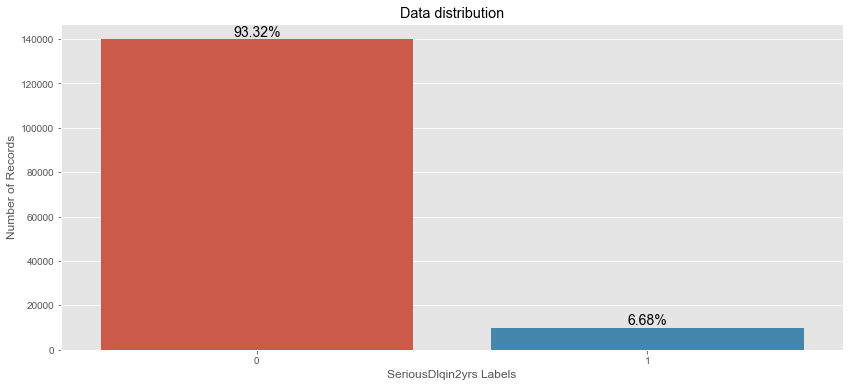

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(data_train_credit['SeriousDlqin2yrs']).set_title("Data distribution")
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 2,
            '{:.2f}%'.format(100 * height/ train_len), fontsize = 14, ha = 'center', va = 'bottom')

sns.set(font_scale = 1.5)
ax.set_xlabel("SeriousDlqin2yrs Labels")
ax.set_ylabel("Number of Records")
plt.show()

 # Inference 
1. There is high amount of imbalance in the dataset
2. Around 140,000 records have label 0 while only 10,000 have label 1

In [19]:
data_train_credit[data_test_credit.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


__Observations:__

1. The average debt seems to be 353 with standard deviation of 2037
2. Maximum debt stands at 329664 which is quite high.
3. Average age of the debtor is around 52. Also, the minimum age is 0 and maxium age is 109. Both these records will  have to be investigated further
4. The minimum monthly income is 0 which will also be investigated further

# Analyzing correlations between Features

In [20]:
data_train_credit[data_train_credit.columns[1:]].corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
MonthlyIncome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
NumberOfTimes90DaysLate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
NumberOfTime60-89DaysPastDueNotWorse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
NumberOfDependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


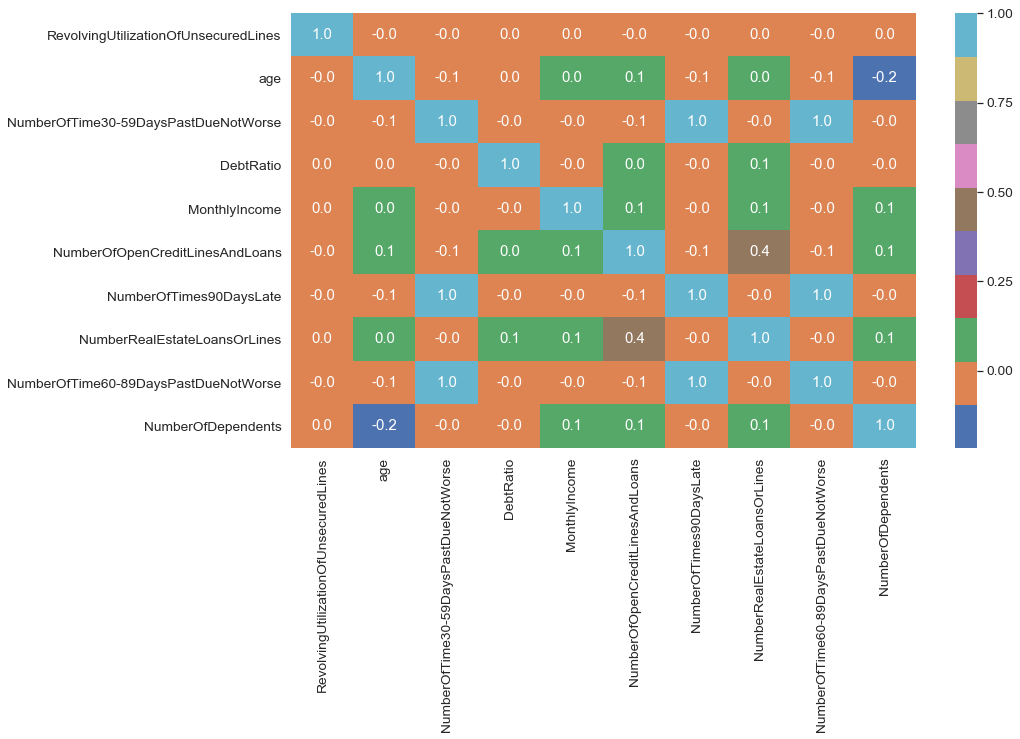

In [21]:
plt.figure(figsize = (14,8))
sns.set(font_scale = 1.25)
sns.heatmap(data_train_credit[data_train_credit.columns[1:]].corr(),annot = True, fmt = ".1f", 
           cmap = (sns.color_palette()))
plt.show()

__Key Observations__

1. Most Features are not correlated with the correlation being 0
2. Some Features are highly correlated with the correlation being 1. Examples, 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate'. We will likely drop one of these later while training the model
3. There are no features with their correlation being between 0.5 and 1


### Detecting Outliers:

#### Interquartile Range Method 

In [22]:
def percentile_outlier(data, threshold = 0.95): #95th percentile.
    diff = (100 - threshold)/2.0
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return ((data < minval) | (data > maxval))

#### Median Absolute Deviation Method

In [23]:
def mad_outlier(points, threshold = 3.5):
    med_y = np.median(points)
    mad_y = np.median([np.abs(y - med_y)  for y in points])
    modified_zscore = [0.6745 * (y - med_y) / mad_y  for y in points]
    return np.abs(modified_zscore) > threshold

#### Standard Deviation Method

In [24]:
def std_div(data, threshold = 3):
    std = data.std()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

#### Majority Vote Based Outlier Detection

In [25]:
def outlierVote(data):
    x = percentile_outlier(data)
    y = mad_outlier(data)
    z = std_div(data)
    temp = list(zip([i for i in range(len(x))], x, y, z))
    final = []
    for i in range(len(x)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
            
    return final

#### Visualizing Outliers

In [32]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows = 4)
    for ax, func in zip(axes, [percentile_outlier, mad_outlier, std_div, outlierVote]):
        sns.distplot(x, ax = ax, rug = True, hist = False, kde_kws={'bw': 0.1})
        outliers = func(x)
        outliers = x[outliers]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on = False)
        
    kwargs = dict(y = 0.95, x = 0.05, ha = 'left', va = 'top', size = 20)
    axes[0].set_title('Percentile Based Outlier Detection', **kwargs)
    axes[1].set_title('Median Absolute Deviation Method', **kwargs)
    axes[2].set_title('Standard Deviation Based Detection', **kwargs)
    axes[3].set_title('Majority Vote Outlier Detection', **kwargs)
    plt.suptitle("Comparing outlier test with n = {}".format(len(x)), size = 20)
    fig = plt.gcf()
    fig.set_size_inches(15, 10)

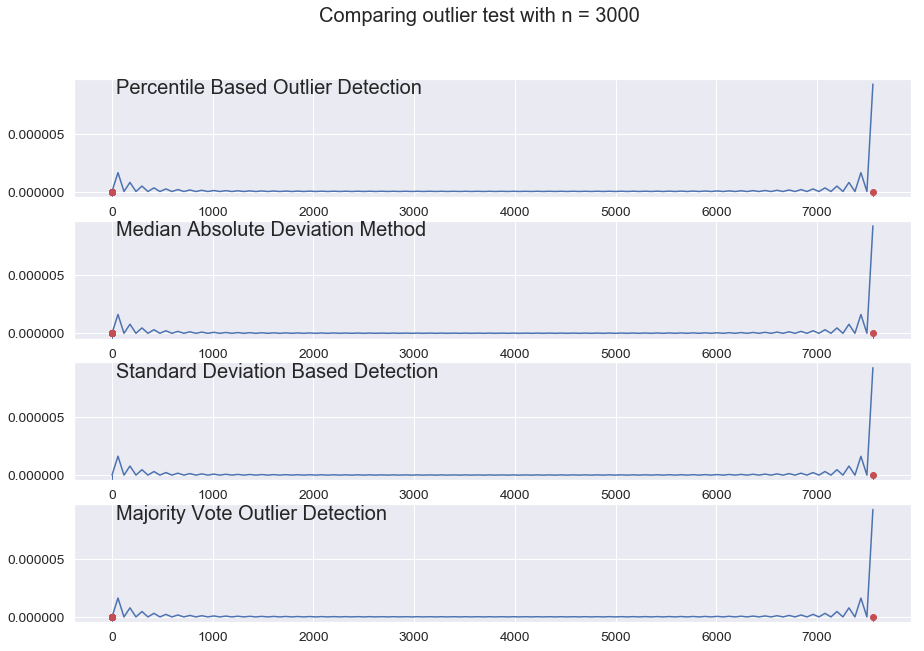

In [27]:
plotOutlier(data_train_credit['RevolvingUtilizationOfUnsecuredLines'].sample(3000).values)

In [28]:
# Removing the outliers.
revNew = []
for val in data_train_credit['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
data_train_credit['RevolvingUtilizationOfUnsecuredLines'] = revNew

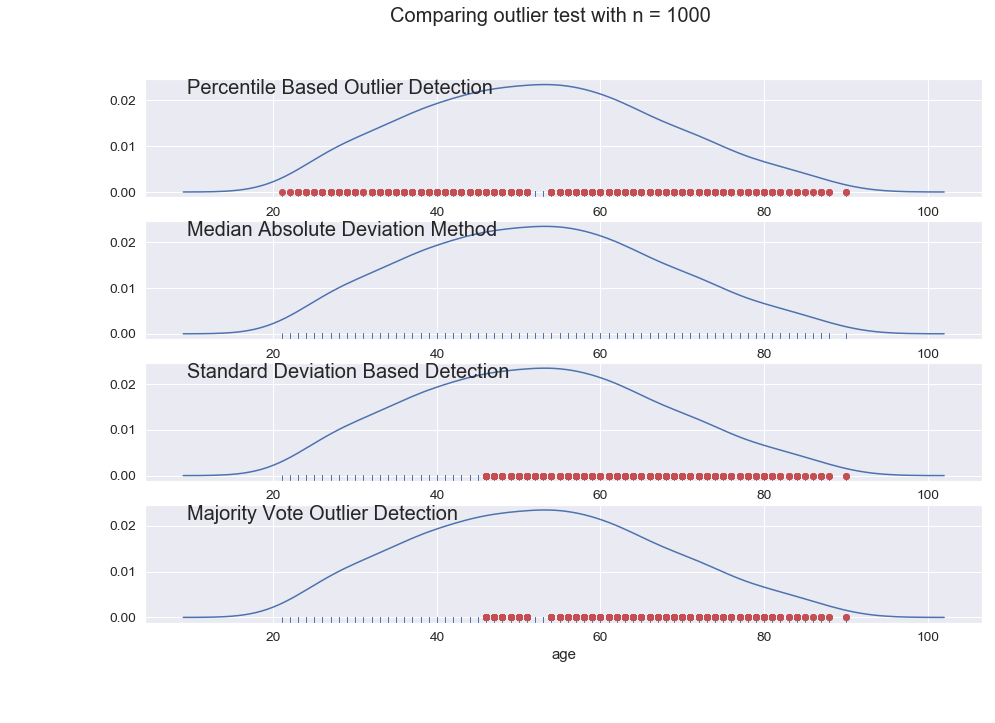

In [29]:
# Checking Age for Outliers
plotOutlier(data_train_credit['age'].sample(1000))

In [30]:
# Removing outliers in age column
ageNew = []
for val in data_train_credit['age']:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
data_train_credit['age'] = ageNew

H:\Python Programming\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
H:\Python Programming\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


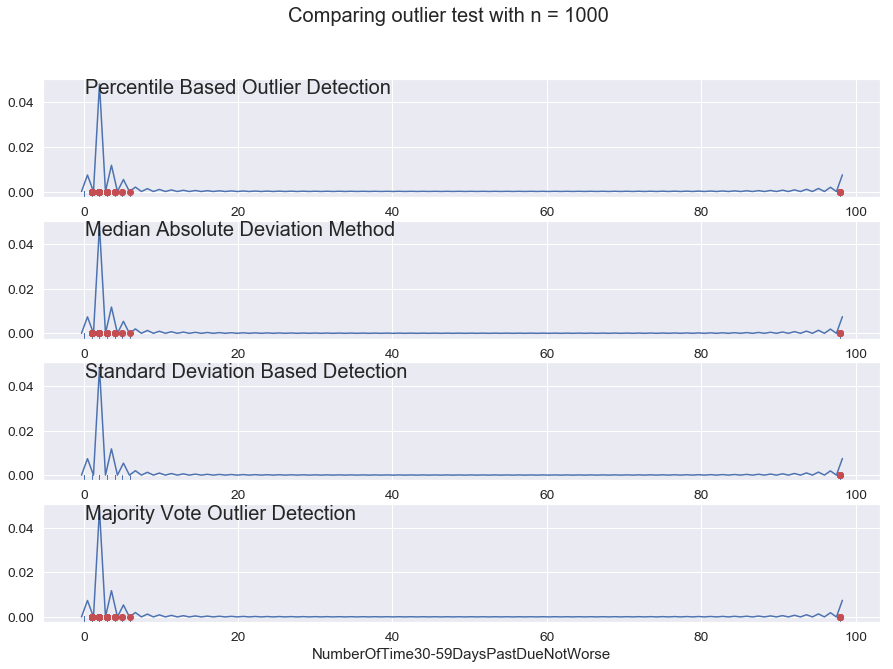

In [33]:
# Detecting outliers for 'NumberOfTime30-59DaysPastDueNotWorse' feature
plotOutlier(data_train_credit['NumberOfTime30-59DaysPastDueNotWorse'].sample(1000))

In [35]:
# Analyzing distribution of values.
import collections
collections.Counter(data_train_credit['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [36]:
# Removing outliers ->
New = []
med = data_train_credit['NumberOfTime30-59DaysPastDueNotWorse'].median()
for val in data_train_credit['NumberOfTime30-59DaysPastDueNotWorse']:
    if val == 96 or val == 98:
        New.append(med)
    else:
        New.append(val)

data_train_credit['NumberOfTime30-59DaysPastDueNotWorse'] = New

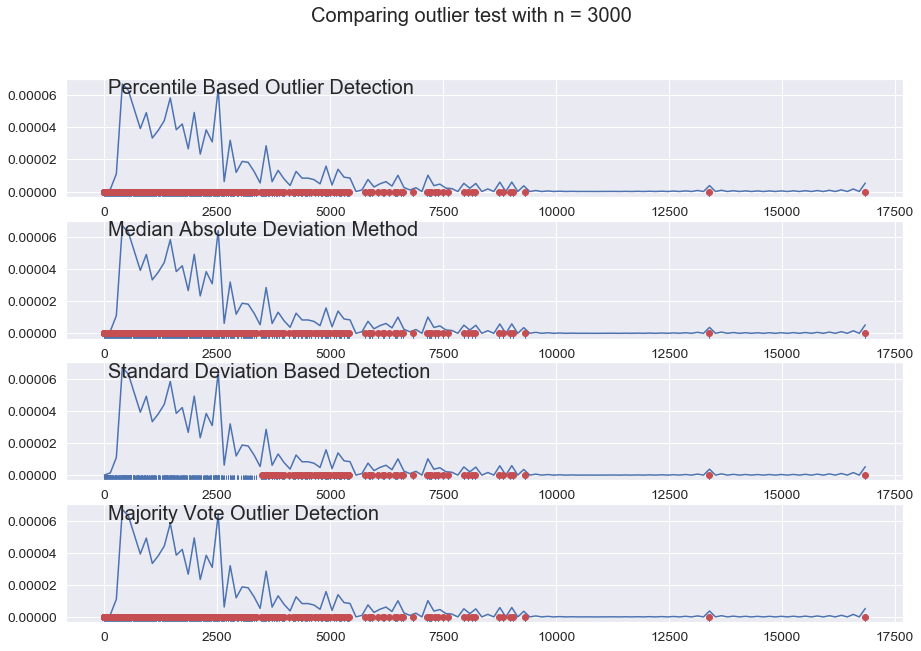

In [37]:
# Checking Debt Ratio
plotOutlier(data_train_credit['DebtRatio'].sample(3000).values)

In [38]:
# It is not very clear hoew to remove outliers so instead we will remove the outliers based on the method that gives the most outliers 
def outlierRatio(data):
    functions = [mad_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1
        
        outlierDict[str(func)[10:].split()[0]] = [count, "{:.2f}%".format((float(count))/len(data) * 100)]
        
    return outlierDict

In [39]:
outlierRatio(data_train_credit['DebtRatio'])

{'mad_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [31727, '21.15%']}

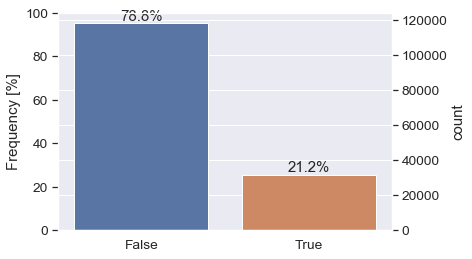

In [40]:
def add_freq():
    ncount = len(data_train_credit)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sns.countplot(mad_outlier(data_train_credit['DebtRatio']))

add_freq()

In [41]:
minUpperBound = min([val for (val, out) in zip(data_train_credit.DebtRatio, mad_outlier(data_train_credit.DebtRatio)) if out == True])

In [42]:
newDebtRatio = []
for val in data_train_credit.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

data_train_credit.DebtRatio = newDebtRatio

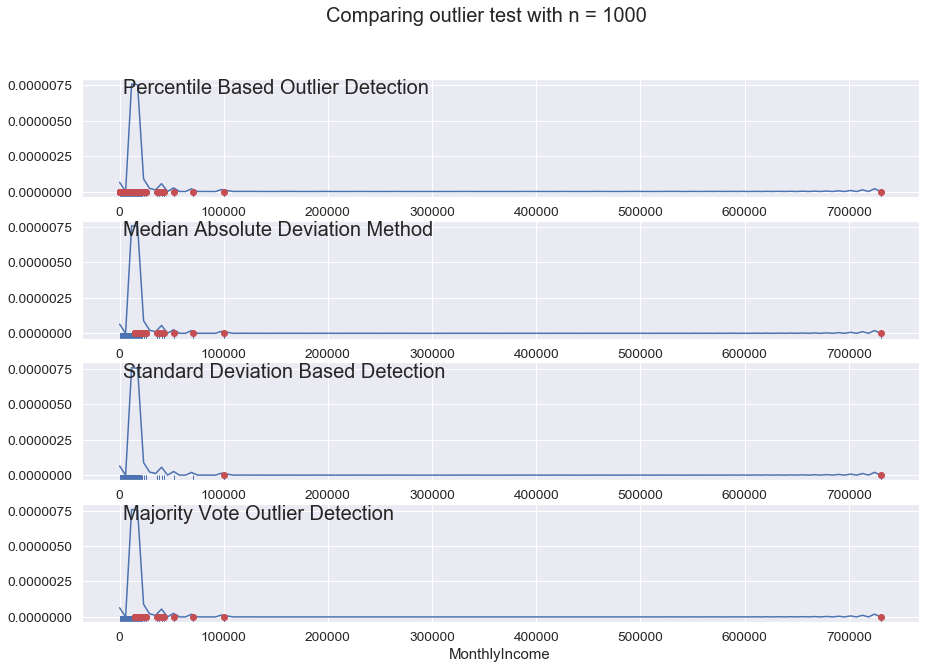

In [43]:
# Checking Outliers for Monthly Income
plotOutlier(data_train_credit.MonthlyIncome.sample(1000))

In [44]:
# Replacing outliers in this feature.
def replaceOutlier(data, method = outlierVote, replace = 'median'):
    vote = outlierVote(data)
    x = pd.DataFrame(list(zip(data, vote)), columns = ['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
            
    return debtNew

In [45]:
incomeNew = replaceOutlier(data_train_credit['MonthlyIncome'], replace = 'minUpper')

In [46]:
data_train_credit['MonthlyIncome'] = incomeNew

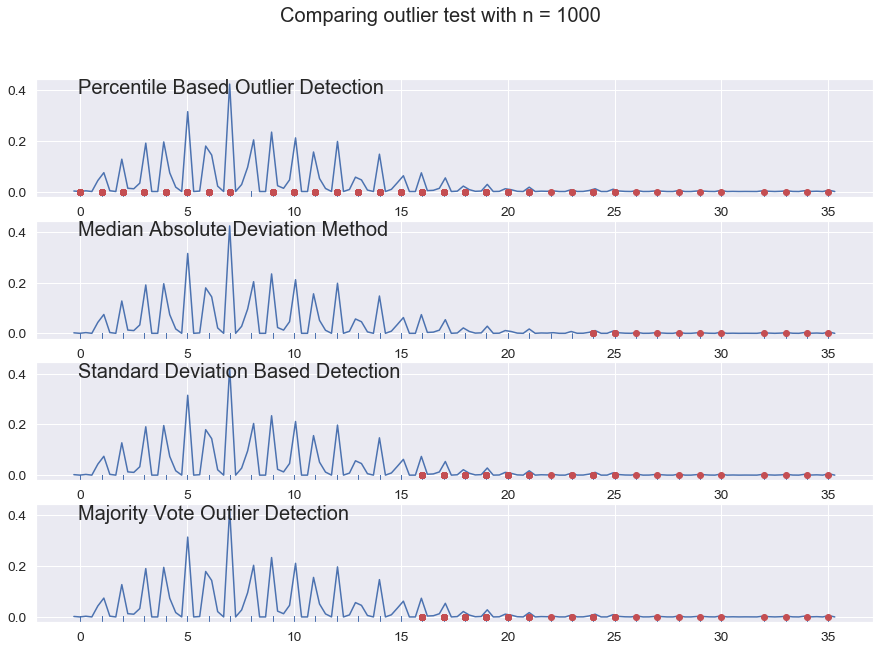

In [47]:
# Plotting Outliers for Open Credit Loans ->
plotOutlier(data_train_credit['NumberOfOpenCreditLinesAndLoans'].sample(1000).values)

'NumberOfOpenCreditLinesAndLoans' feature looks OK. No need to make any changes

In [48]:
# Checking Outliers for 'NumberOfTimes90DaysLate' feature
collections.Counter(data_train_credit['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [49]:
# Removing 96 and 98:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [50]:
new = removeSpecificAndPutMedian(data_train_credit['NumberOfTimes90DaysLate'])
data_train_credit['NumberOfTimes90DaysLate'] = new

In [51]:
# Analyzing no. of real estate or lines
collections.Counter(data_train_credit['NumberRealEstateLoansOrLines'])

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [52]:
realNew = []
for val in data_train_credit['NumberRealEstateLoansOrLines']:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
    
data_train_credit['NumberRealEstateLoansOrLines'] = realNew

In [53]:
# Analyszing 'NumberOfTime60-89DaysPastDueNotWorse' feature
collections.Counter(data_train_credit['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [54]:
new = removeSpecificAndPutMedian(data_train_credit['NumberOfTime60-89DaysPastDueNotWorse'])
data_train_credit['NumberOfTime60-89DaysPastDueNotWorse'] = new

In [55]:
# Analyzing 'NumberOfDependents' feature
collections.Counter(data_train_credit['NumberOfDependents'])

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [56]:
depNew = []
for val in  data_train_credit['NumberOfDependents']:
    if val > 10:
        depNew.append(10)
    else:
        depNew.append(val)

data_train_credit['NumberOfDependents'] = depNew

In [57]:
# Checking final data
data_train_credit.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.319195,52.295347,0.245353,0.607359,5954.22150,8.452760,0.090293,1.017407,0.064707,0.737327
std,0.249746,0.349480,14.771470,0.697231,0.588294,3227.28881,5.145951,0.485107,1.111560,0.329788,1.105968
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3903.00000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.00000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7400.00000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,0.999990,109.000000,13.000000,1.641791,14128.00000,58.000000,17.000000,17.000000,11.000000,10.000000


In [58]:
data_train_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0.024926,14128.0,7,0.0,1,0.0,0.0


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
data_train_credit.columns[1:]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [61]:
X = data_train_credit.drop('SeriousDlqin2yrs', axis = 1)
y = data_train_credit['SeriousDlqin2yrs']
feature_labels = data_train_credit.columns[1:]
forest_clf = RandomForestClassifier(n_estimators = 1000, random_state = 0, verbose = 1)
forest_clf.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.3min finished


RandomForestClassifier(n_estimators=1000, random_state=0, verbose=1)

In [62]:
importance = forest_clf.feature_importances_
indices = np.argsort(importance)[::-1]
for i in range(X.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, feature_labels[i], importance[indices[i]]))

 1) RevolvingUtilizationOfUnsecuredLines 0.189921
 2) age                            0.155049
 3) NumberOfTime30-59DaysPastDueNotWorse 0.149329
 4) DebtRatio                      0.142442
 5) MonthlyIncome                  0.098295
 6) NumberOfOpenCreditLinesAndLoans 0.087707
 7) NumberOfTimes90DaysLate        0.050236
 8) NumberRealEstateLoansOrLines   0.045810
 9) NumberOfTime60-89DaysPastDueNotWorse 0.044594
10) NumberOfDependents             0.036616


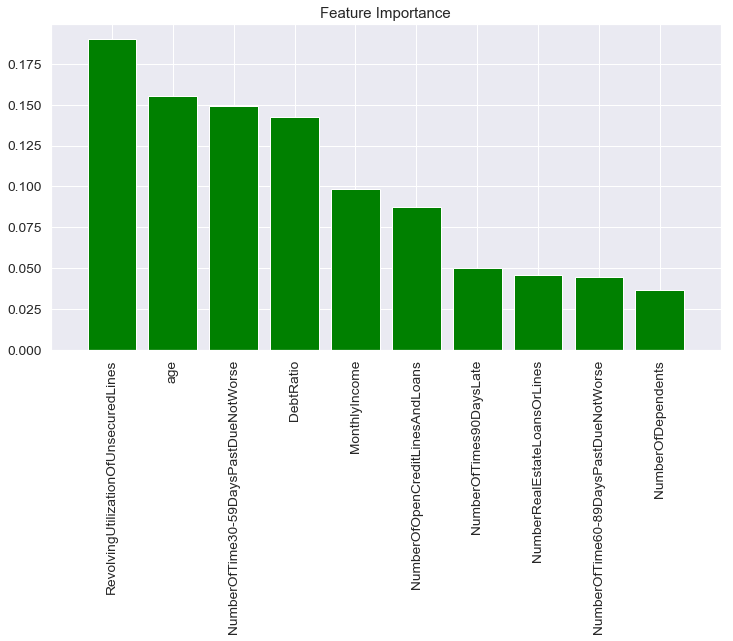

In [63]:
plt.figure(figsize=(12,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], color = 'green', align = 'center')
plt.xticks(range(X.shape[1]), feature_labels, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Training ML Models

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [65]:
X = data_train_credit.drop('SeriousDlqin2yrs', axis = 1)
y = data_train_credit['SeriousDlqin2yrs']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [67]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, metric_params = None)
adaboost = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
gbdt = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.1, n_estimators = 200, min_samples_split = 2,
                                  min_samples_leaf = 1, max_depth = 3, subsample = 1.0)
forest = RandomForestClassifier(n_estimators = 10)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [70]:
logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [71]:
logistic.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [72]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [73]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

# Evaluating the baseline models

In [74]:
print ("Accuracy for k-Nearest Neighbours - ", knn.score(X_test, y_test))
print ("Accuracy for logistics regression - ", logistic.score(X_test, y_test))
print ("Accuracy for adaboost classifier - ", adaboost.score(X_test, y_test))
print ("Accuracy for gradient boosted decision trees - ", gbdt.score(X_test, y_test))
print ("Accuracy for random forest classifier - ", forest.score(X_test, y_test))

Accuracy for k-Nearest Neighbours -  0.9327733333333333
Accuracy for logistics regression -  0.9372533333333334
Accuracy for adaboost classifier -  0.93552
Accuracy for gradient boosted decision trees -  0.93624
Accuracy for random forest classifier -  0.9328


In [75]:
print(" ------------------- Using ROC Metric--------------------")
print ("1. KNN       -> ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("1. LR        -> ", roc_auc_score(y_test, logistic.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("1. AdaBoost  -> ", roc_auc_score(y_test, adaboost.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("4. GBDT      -> ", roc_auc_score(y_test, gbdt.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("5. RF        -> ", roc_auc_score(y_test, forest.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))

 ------------------- Using ROC Metric--------------------
1. KNN       ->  0.5865407785301457
1. LR        ->  0.8520528343850186
1. AdaBoost  ->  0.8586126690944704
4. GBDT      ->  0.8649438026382537
5. RF        ->  0.7794836415893645


### Observation
> Adaboost and GBDT have performed the best so we will imporvise upon them for the remainder of our analysis

### For improvising, we will use the following methods
  1. Hyperparamter tuning
  2. Performing Cross-Validaton
  3. Checking for overfitting or underfitting of models

#### K-fold Cross-Validation:

In [76]:
from sklearn.model_selection import cross_val_score 

In [77]:
# Defining a function for cross-validation in order to save time by not writing the same code again
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5, verbose = 1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, verbose = verbose, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format(( cvDict[key][0])/(cvDict[cvDict.keys()[0]][0]) ),
                                     '{:0.2f}'.format(( cvDict[key][1])/(cvDict[cvDict.keys()[0]][1]) )]
            
    return cvDictNormalized

In [78]:
cvD = cvDictGen([knn, logistic, adaboost, gbdt, forest], scr = 'roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s finished


{'KNeighborsClassifier': [0.5967029025312096, 0.002345281430065525],
 'LogisticRegression': [0.8495595578532061, 0.003579020049961203],
 'AdaBoostClassifier': [0.8585977120326229, 0.002096398094966127],
 'GradientBoostingClassifier': [0.8639187453190125, 0.0026151394669156267],
 'RandomForestClassifier': [0.7767785865258177, 0.0044862793398137615]}

# Hyper parameter Tuning using Randomized search

In [79]:
adaParams = {'n_estimators':[10,50,100,200,400]}
from sklearn.model_selection import RandomizedSearchCV

In [84]:
gridSearchAda = RandomizedSearchCV(estimator=adaboost, param_distributions=adaParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.5s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.0s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.2min finished


In [86]:
gridSearchAda.best_estimator_, gridSearchAda.best_score_

(AdaBoostClassifier(n_estimators=100), 0.8578215141099882)

In [87]:
# Hyper parameter using GBDT :
from random import randint
gbParams = {'loss': ['deviance', 'exponential'],
            'n_estimators': [10, 50, 100, 200, 400],
            'max_depth': [3,5,7,9]}

In [89]:
gb = RandomizedSearchCV(estimator = gbdt, param_distributions = gbParams, n_iter = 10, scoring = 'roc_auc', cv = None, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=5, loss=deviance ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... n_estimators=100, max_depth=5, loss=deviance, total=  24.0s
[CV] n_estimators=100, max_depth=5, loss=deviance ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.9s remaining:    0.0s


[CV] ..... n_estimators=100, max_depth=5, loss=deviance, total=  23.7s
[CV] n_estimators=100, max_depth=5, loss=deviance ....................
[CV] ..... n_estimators=100, max_depth=5, loss=deviance, total=  23.2s
[CV] n_estimators=100, max_depth=5, loss=deviance ....................
[CV] ..... n_estimators=100, max_depth=5, loss=deviance, total=  23.0s
[CV] n_estimators=100, max_depth=5, loss=deviance ....................
[CV] ..... n_estimators=100, max_depth=5, loss=deviance, total=  23.0s
[CV] n_estimators=10, max_depth=3, loss=exponential ..................
[CV] ... n_estimators=10, max_depth=3, loss=exponential, total=   1.4s
[CV] n_estimators=10, max_depth=3, loss=exponential ..................
[CV] ... n_estimators=10, max_depth=3, loss=exponential, total=   1.5s
[CV] n_estimators=10, max_depth=3, loss=exponential ..................
[CV] ... n_estimators=10, max_depth=3, loss=exponential, total=   1.5s
[CV] n_estimators=10, max_depth=3, loss=exponential ..................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 36.6min finished


In [90]:
gb.best_estimator_, gb.best_score_

(GradientBoostingClassifier(loss='exponential'), 0.8630653150930838)

#### Training the best models with the new parameters

In [92]:
bestadaboost = gridSearchAda.best_estimator_.fit(X_train, y_train)
bestgbdt = gb.best_estimator_.fit(X_train, y_train)

In [93]:
# Testing the Best Models :
print("Best adaboost-> ",roc_auc_score(y_test, bestadaboost.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print("Best GBDT    -> ",roc_auc_score(y_test, bestgbdt.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))

Best adaboost->  0.8582779149135614
Best GBDT    ->  0.8644581452854387


#### Conclusion
> We shall now try other methods that can help in improving the models and make better predictions

# Feature Engineering:
> Lets now try or hand on Feature Transformation in order to achieve a better roc score

In [94]:
from sklearn.preprocessing import FunctionTransformer

In [95]:
transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [96]:
bestadaboost_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [97]:
bestgbdt_transformed = gb.best_estimator_.fit(X_train_transform, y_train)

In [98]:
cvDictBestParam_transform = cvDictGen(functions=[bestadaboost_transformed, bestgbdt_transformed], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [99]:
cvDictBestParam_transform

{'AdaBoostClassifier': [0.8591468159728505, 0.002580346154686282],
 'GradientBoostingClassifier': [0.8633919347976283, 0.003128006198089223]}

> Unfortunaltely, we don't see much of a change in accuracy. So, we shall try another method

### Voting Based Ensemble Method:

In [100]:
from sklearn.ensemble import VotingClassifier

In [101]:
voting_clf = VotingClassifier(estimators=[('gb', bestgbdt_transformed), ('ada', bestadaboost_transformed)], voting='soft',
                             weights=[2,1])
voting_clf = voting_clf.fit(X_train_transform, y_train)

In [102]:
X_test_transform = transformer.transform(X_test)
test_labels = voting_clf.predict_proba(X_test_transform)[:,1]

In [103]:
voting_clf.score(X_test_transform, y_test)

0.9368

In [104]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8642172070113876

In [105]:
voting_clf_old = VotingClassifier(estimators=[('gb', bestgbdt_transformed), ('ada', bestadaboost_transformed)], voting='soft',
                                                weights=[2,1])
voting_clf_old = voting_clf_old.fit(X_train, y_train)

In [106]:
test_labels = voting_clf_old.predict_proba(X_test)[:,1]
voting_clf_old.score(X_test, y_test)

0.9368

In [107]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8642171839225038

### Conclusion
> We shall go by this method for making predictions

### Running the model on Real Test Data 

In [109]:
test_data = pd.read_csv('H:/Credit Risk Modelling/Credit-Risk-Modelling-master/cs-test.csv')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data.drop('SeriousDlqin2yrs', axis = 1, inplace=True)
test_data.fillna(data_train_credit.median(), inplace=True)

In [110]:
test_labels_votingOld = voting_clf_old.predict_proba(test_data)[:,1]
print (len(test_labels_votingOld))

101503


In [112]:
output = pd.DataFrame({'ID': test_data.index, 'Probability': test_labels_votingOld})

In [113]:
output.to_csv("H:/Credit Risk Modelling/Credit-Risk-Modelling-master/final_predictions.csv", index = False)